In [2]:
import os, glob
from datetime import date

import re
import pandas as pd
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp

import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np

import docx
from docx.shared import Inches

C:\Users\sylwi\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sylwi\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\sylwi\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1

In [3]:
# Define function to load article, clean the structure and text from unwanted characters and extract seperate words
def clean_data_init(text):
    text=open(text).read()
    lower_text=text.strip().lower()
    del_num=re.sub(r'\d+',' ',lower_text)
    
    charlist_remove=["\t",",",".","\"","?","- ",":","’",'”','“']
    charlist_replace=["\n","-"]
    
    remove_char=del_num
    for x in charlist_remove:
        remove_char=remove_char.replace(x,"")
        
    replace_char_space=remove_char
    for y in charlist_replace:
        replace_char_space=replace_char_space.replace(y," ")


    remove_double_space=re.sub(' +',' ',replace_char_space)
    text_csv=remove_double_space.replace(' ',',') 
    tokens = nltk.word_tokenize(remove_double_space, language='english', preserve_line=True)
    return tokens

In [4]:
# Define function to remove english stopwords (commonly used words which carry no substantive information)
def remove_stopword(tokens):
    custom_stop_words = {"'s","'m","'d","'t","n't"}
    stop_words = set(stopwords.words('english'))
    stop_words.update(custom_stop_words)
    filter_words = [word for word in tokens if word not in stop_words]
    return filter_words

In [5]:
#  Definae function to lemmatize text
def lemmatization(tokens):
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatize_words = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatize_words = [lemmatizer.lemmatize(token, "v") for token in lemmatize_words]
    lemmatize_words = [lemmatizer.lemmatize(token, "a") for token in lemmatize_words]
    lemmatize_words = [lemmatizer.lemmatize(token, "r") for token in lemmatize_words]
    lemmatize_words = [lemmatizer.lemmatize(token, "s") for token in lemmatize_words]
    return lemmatize_words

In [6]:
# Define final function to clean article's text and transform it to a list of words
def clean_data(text):
    tokens = clean_data_init(text)
    filter_words = remove_stopword(tokens)
    lemmatize_words = lemmatization(filter_words)
    final_text = ','.join(lemmatize_words)
    return final_text

In [7]:
# Clean article's text, get file from cwd
cwd=os.getcwd().replace('\\','\\\\')
article_text_path=glob.glob(f'{cwd}\\*.txt')[0]

data=clean_data(article_text_path)
data

'king,spend,first,anniversary,mother,death,accession,scottish,highland,retreat,friday,may,reflect,back,year,historic,transition,see,year,suggestion,charles,see,caretaker,king,keep,throne,warm,new,prince,wale,real,reformer,scenario,recognise,buckingham,palace,eye,catch,reform,first,year,fairly,describe,cautious,king,clue,aspiration,small,change,turbo,charge,royal,reception,harness,soft,power,maximum,source,point,knowledge,long,speak,publicly,subject,remain,passionate,convene,king,label,seem,accept,advise,liz,truss,government,attend,cop,climate,conference,egypt,instead,host,eve,cop,reception,international,representative,buckingham,palace,find,way,remain,leader,field,climate,crisis,albeit,within,new,constitutional,parameter,constrain,informal,formality,byword,reception,large,scale,event,–,february,british,east,south,east,asian,community,nature,reception,change,late,queen,day,precisely,charles,long,able,become,involve,certain,area,source,indicate,also,see,head,state,symbol,continuity,stabi

In [8]:
# Convert list of words to a dataframe
list=data.split(',')
df = pd.DataFrame(list, columns=['words'])
print(df)

           words
0           king
1          spend
2          first
3    anniversary
4         mother
..           ...
765          yet
766          see
767    potential
768        early
769          day

[770 rows x 1 columns]


In [9]:
# Check first 5 words
df["words"].head()

0           king
1          spend
2          first
3    anniversary
4         mother
Name: words, dtype: object

In [10]:
# Count number of words in the dataframe
df.count()

words    770
dtype: int64

In [111]:
# Generate dataframe's basic descriptive statistics
from pandas.plotting import table
df_descriptive_stats = df.describe()
df_descriptive_stats_string = df_descriptive_stats[['words']].to_string()
df_descriptive_stats

,words
count,770
unique,480
top,say
freq,16


In [93]:
# Get more statistics info about dataframe and words from given article
sentence_1 = "There are {} rows and {} column(s) in this dataframe.".format(df.shape[0],df.shape[1])
sentence_2 = "There are {} unique words in this article, e.g.: {}.".format(len(df.words.unique()),", ".join(df.words.unique()[0:4]))
print(sentence_1)
print(sentence_2)

There are 770 rows and 1 column(s) in this dataframe.
There are 480 unique words in this article, e.g.: king, spend, first, anniversary.


In [94]:
# Count frequency of words 
counts_by_word=df['words'].value_counts().head(20)
print(counts_by_word)

words
say          16
king         15
charles      12
see          11
year          9
royal         9
first         7
late          7
prince        7
make          6
little        6
queen         6
remain        5
princess      5
day           5
go            5
harry         5
reception     5
duke          5
one           4
Name: count, dtype: int64


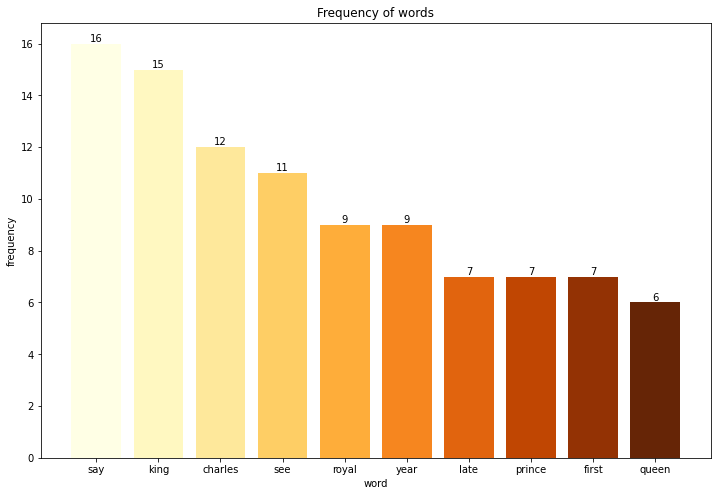

In [95]:
# Present frequency of words on a chart
top_words=df.groupby('words').size().sort_values(ascending=False).head(10)

y_list=[]
for y in top_words:
    y_list.append(y)

x_list=[]
for x in top_words.index:
    x_list.append(x)

fig = plt.figure(figsize=(12,8))

color_map=mcp.gen_color(cmap="YlOrBr", n=10)
chart = plt.bar(x=x_list, height=y_list, color=color_map)

plt.xlabel("word")
plt.ylabel("frequency")
plt.title("Frequency of words")
chart = plt.bar_label(chart, labels=y_list, label_type="edge")
plt.show()


In [106]:
# Set word cloud parameters
image_mask=np.array(Image.open(glob.glob(f'{cwd}\\mask_image*')[0]))
wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
                            stopwords = STOPWORDS,
                            background_color = 'black',
                            mask = image_mask,
                            contour_width = 2,
                            width=1584, height=396,
                            max_font_size=80, min_font_size=10,
                            colormap=plt.cm.seismic
                            # color_func=random_color_func
                            ).generate(data)

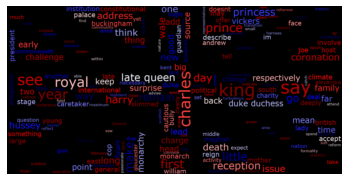

In [107]:
# Plot a word cloud image preview
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.margins(x=10, y=30)
plt.show()

In [108]:
# Get article's title
article_title=os.path.basename(article_text_path).split('/')[-1].split('_.')[0]
print(article_title)

What_a_year_of_King_Charles_has_shown_us_about_how_he_wants_to_reign


In [109]:
# Save a word cloud image as png file
wordcloud.to_file(f'{article_title}_wordcloud.png')
fig.savefig(f'{article_title}_freqWords_chart.png')

In [110]:
# Save analysis results in a docx file
document = docx.Document()
article_title_cleaned = article_title.replace('_',' ')

document.add_heading('Text Analysis Results', 0)
document.add_heading(f'Article title: {article_title_cleaned}', 3)

h4 = document.add_heading('',4)
runner=h4.add_run('Insights:')
runner.italic = False
runner.bold = False

document.add_paragraph(sentence_1)
document.add_paragraph(sentence_2)

document.add_paragraph('Descriptive statistics:')
document.add_paragraph('#' + df_descriptive_stats_string)

document.add_picture(glob.glob(f'{cwd}\\*_freqWords_chart*')[0], width=Inches(4))
document.add_picture(glob.glob(f'{cwd}\\*_wordcloud*')[0], width=Inches(4))

document.save("article_analysis_results.docx")